# **Final Project: Regression Analysis (Medical Cost Dataset)**

### **Author:** Deb St. Cyr
### **Date:** November 2025


### Introduction
The Medical Cost dataset contains information about patients and their medical insurance charges. The goal of this project is to build a regression model that can predict a person’s medical costs based on demographic and health-related features such as age, BMI, smoking status, and number of dependents. Understanding how these factors contribute to insurance charges can support decision-making for healthcare providers, insurance companies, and policy analysts.

This notebook walks through the complete regression workflow:

- Importing and inspecting the dataset

- Exploring distributions and identifying patterns

- Cleaning, preprocessing, and encoding categorical data

- Selecting features and defining the target

- Training a baseline Linear Regression model

- Building improved versions using pipelines

- Comparing model performance using regression metrics

- Reflecting on findings and insights

The dataset includes both numerical and categorical features, which allows for meaningful exploration and model building. The target variable, *charges*, represents actual medical insurance costs and takes on a wide range of continuous numeric values. Because of this, regression is the most appropriate modeling approach.

## Section 1 - Import and Inspect the Data

### 1.1 - Load the dataset and display the first 10 rows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Load your uploaded dataset
df = pd.read_csv("data/insurance.csv")

# Display first 10 rows
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 - Summary Statistics & Missing Values

In [17]:
# Check for missing values
df.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [32]:
# Summary statistics
df.describe(include='all')


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Reflection 1

The Medical Cost dataset is in good shape. It has all the necessary information with no missing data.
- Data Types: It contains both numbers (age, BMI, number of children, and charges) and categories (gender, smoker status, and geographic region).
- Target: The variable we're trying to predict, *charges*, has a very wide spread, meaning there might be some extremely high costs (outliers).
- Key Predictor: The smoker status seems like it will be a very important factor in determining the charges.
  
Overall, the dataset is ready for analysis. I just need to do some basic preparation (like converting the categories into numbers) before modeling.

## Section 2 - Data Exploration & Preparation

### 2.1 Histograms, Boxplots, Count Plots, and Heat Map

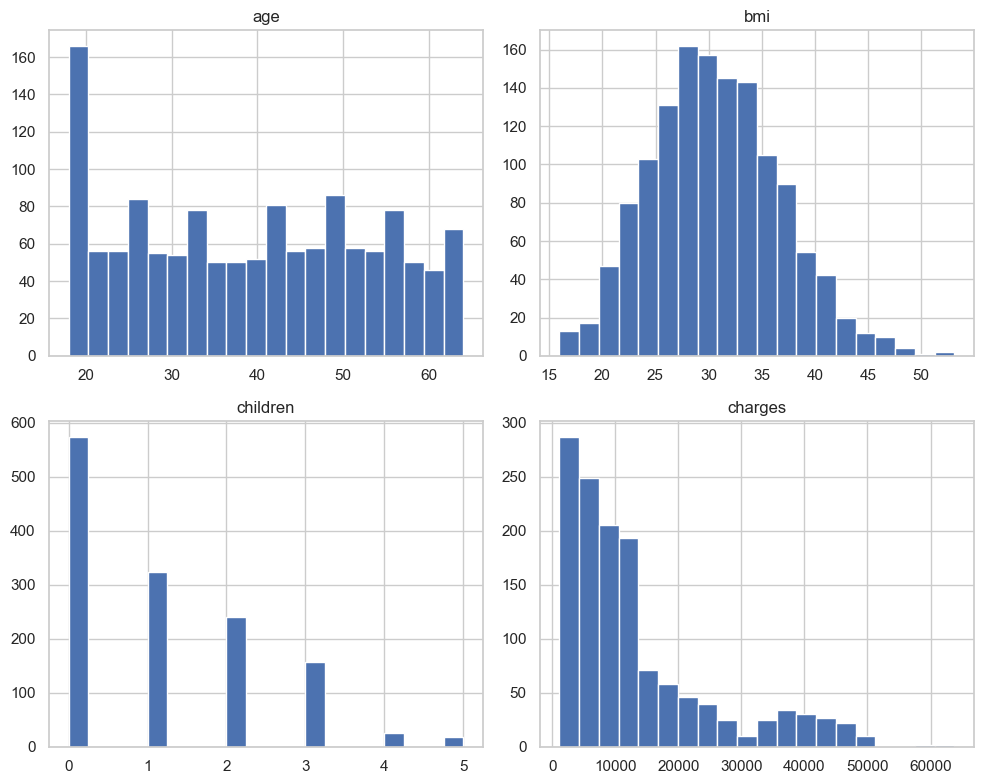

In [ ]:
# Distribution Plots 

# Histograms of numerical features
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


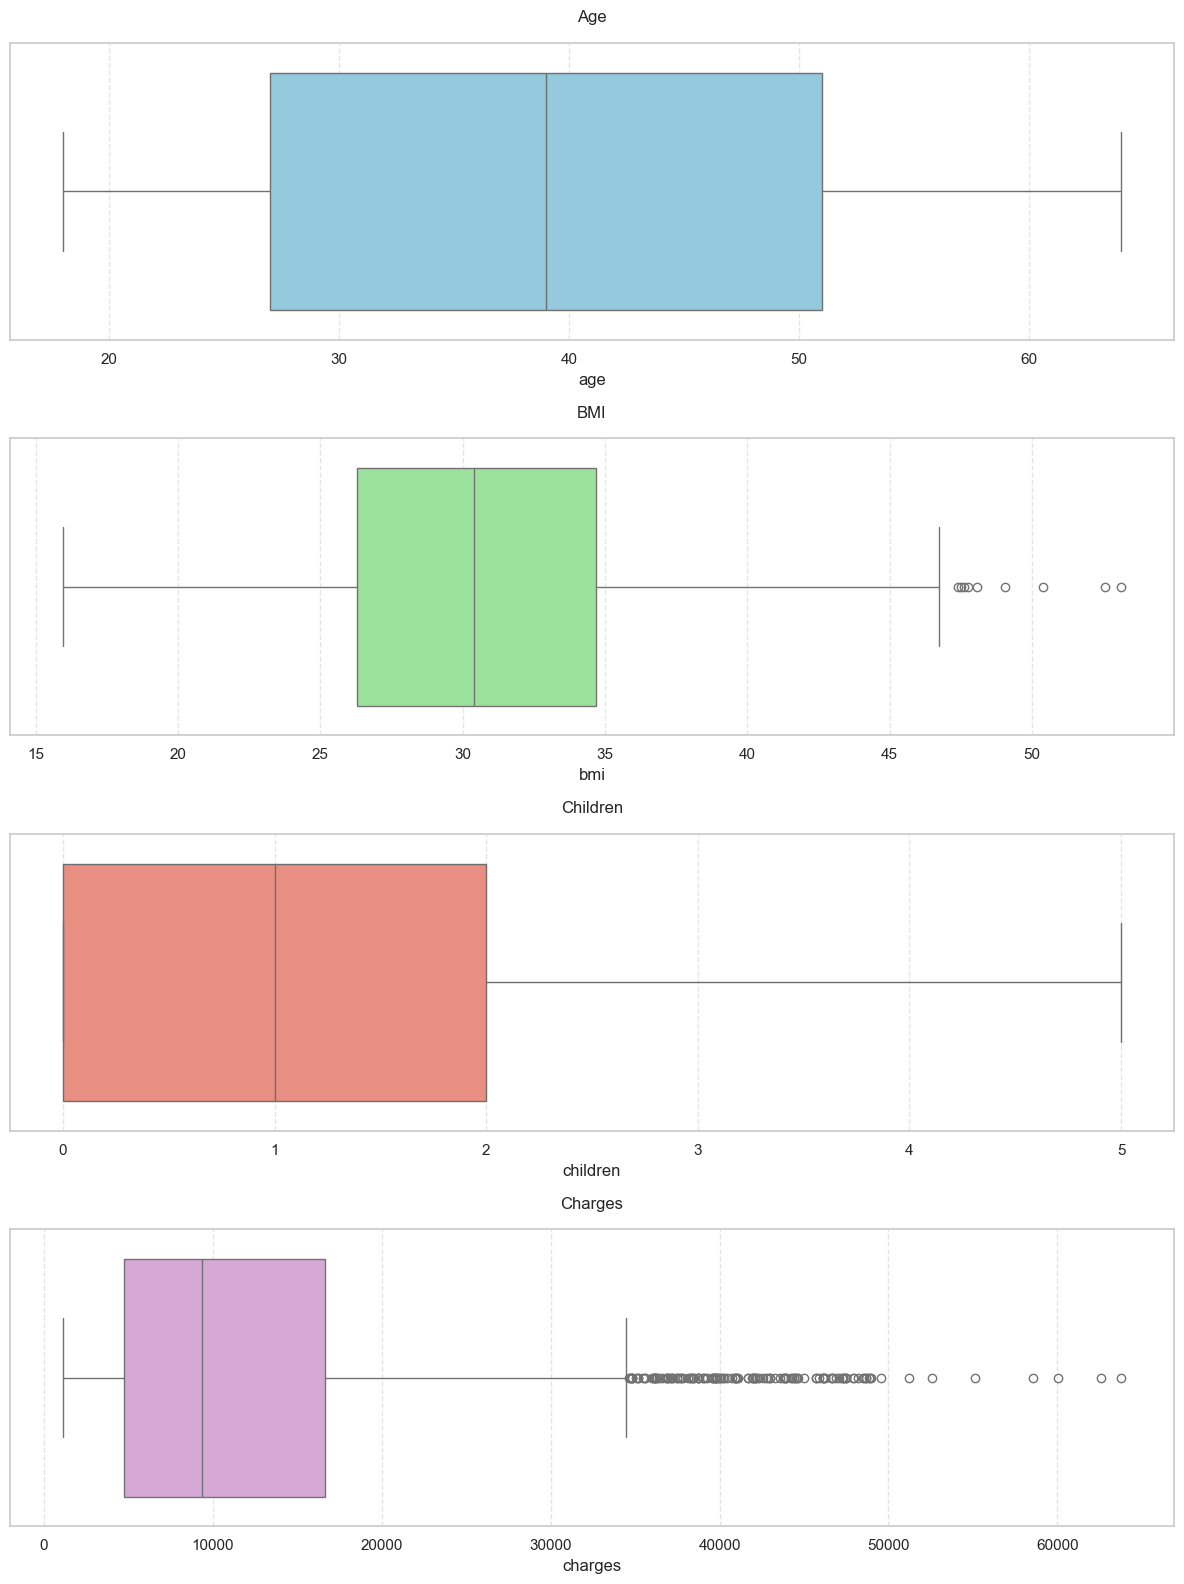

In [119]:
# Boxplots for Outliers

fig, axes = plt.subplots(4, 1, figsize=(12, 16))

# Turn on gridlines and make them subtle
for ax in axes:
    ax.grid(axis='x', linestyle='--', alpha=0.5)

# Age
sns.boxplot(ax=axes[0], x=df['age'], color='skyblue')
axes[0].set_title('Age', pad=15)

# BMI
sns.boxplot(ax=axes[1], x=df['bmi'], color='lightgreen')
axes[1].set_title('BMI', pad=15)

# Children
sns.boxplot(ax=axes[2], x=df['children'], color='salmon')
axes[2].set_title('Children', pad=15)

# Charges
sns.boxplot(ax=axes[3], x=df['charges'], color='plum')
axes[3].set_title('Charges', pad=15)

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.8)

plt.tight_layout()
plt.show()


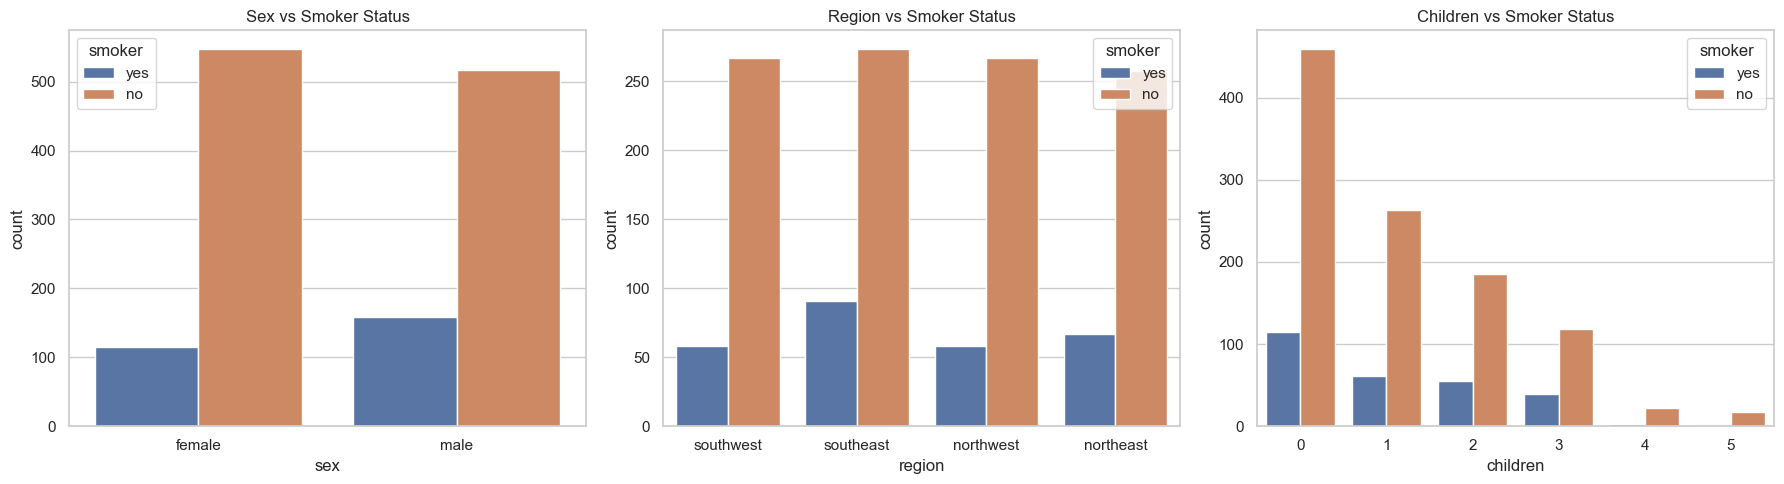

In [131]:
# Count Plots for Categorical Features

# Count Plots with Smoker Hue
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(ax=axes[0], data=df, x='sex', hue='smoker')
axes[0].set_title('Sex vs Smoker Status')

sns.countplot(ax=axes[1], data=df, x='region', hue='smoker')
axes[1].set_title('Region vs Smoker Status')

sns.countplot(ax=axes[2], data=df, x='children', hue='smoker')
axes[2].set_title('Children vs Smoker Status')

plt.tight_layout()
plt.show()


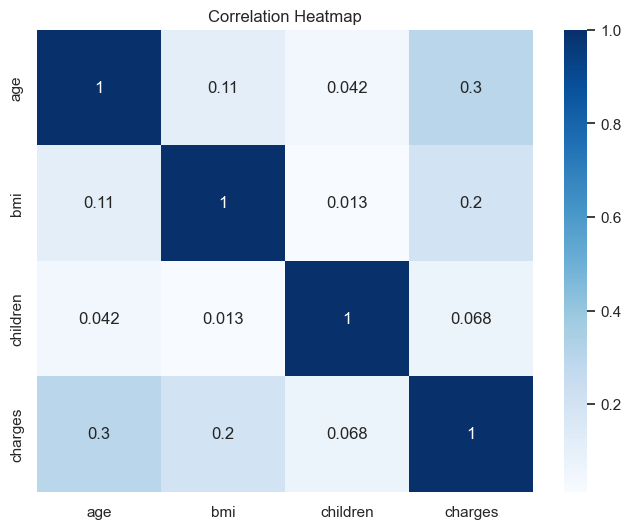

In [132]:
# Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


In [133]:
# Encode Categorical Variables

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [142]:
# 2.2 Handling Missing Values and Cleaning Data

# Check for missing values
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset did not contain any missing values, so no imputation or deletion steps were necessary.
I also reviewed the numeric columns through histograms and boxplots and found some high BMI and charges values, but these appear to be real observations rather than errors, so I kept them in the dataset.

### 2.3 Feature Selection & Engineering

In [151]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


For this project, the main feature engineering step was converting categorical variables (sex, smoker, and region) into numerical form using one-hot encoding.
I used `get_dummies(drop_first=True)` to avoid multicollinearity in the regression model.
I did not create additional features because the existing ones were sufficient for the goals of this project, and the dataset is already in a clean, usable format.

### Reflection 2

From the visualizations, the biggest pattern I noticed was how different smokers and non-smokers were. Every count plot showed far more non-smokers, and the Southeast region had the most smokers overall. The boxplots also showed some high BMI values and very high medical charges, but they didn’t look like errors.

Smoking status clearly stood out the most as a feature that affects charges. Age and BMI showed some patterns too, while the number of children didn’t seem strongly related to costs.

There were no missing values, so I didn’t need to clean or impute anything. The only real preprocessing step was converting the categorical variables into numerical ones using one-hot encoding. I didn’t create any new features because the dataset was already clean and the existing variables were enough for this project.

## Section 3 - Feature Selection & Justification

### 3.1 Choose Feature and Target

For this regression project, I used all available features from the insurance dataset. These include age, BMI, number of children, sex, smoker status, and region (after encoding). Each one can influence medical charges for different reasons:

- **Age** – Older individuals typically require more medical care, which increases costs.

- **BMI** – Higher BMI can be associated with health risks and higher expenses.

- **Children** – The number of dependents may impact insurance costs.

- **Smoker status** – This is one of the strongest predictors because smokers generally face higher medical risks and significantly higher charges.

- **Sex and Region** – These may have smaller impacts on charges but still add useful variation to help the model learn patterns.

The **target variable** for this regression model is **charges**, which is a continuous numerical value representing individual medical insurance costs.

### 3.2 Define X and Y

In [160]:
# Define target variable y
y = df_encoded['charges']

# Define feature matrix X (all columns except 'charges')
X = df_encoded.drop('charges', axis=1)

# Display first few rows of X and y
X.head(), y.head()


(   age     bmi  children  sex_male  smoker_yes  region_northwest  \
 0   19  27.900         0     False        True             False   
 1   18  33.770         1      True       False             False   
 2   28  33.000         3      True       False             False   
 3   33  22.705         0      True       False              True   
 4   32  28.880         0      True       False              True   
 
    region_southeast  region_southwest  
 0             False              True  
 1              True             False  
 2              True             False  
 3             False             False  
 4             False             False  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

### Reflection 3

I chose these features because they are all connected to medical insurance costs, either through general health factors or how insurance companies calculate premiums. Smoker status, age, and BMI stand out the most because they showed stronger patterns in the visualizations. Including all available features (after encoding) gives the model a more complete view of the data, which should help improve prediction accuracy.

## Section 4 - Train a Model (Linear Regression)

I used `train_test_split` with an 80/20 split to separate the dataset into training and test sets.

### 4.1 Splitting and Training Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1070, 8), (268, 8))

### 4.2 Train a Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression

# Create the model
lin_reg = LinearRegression()

# Train (fit) the model
lin_reg.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)


### 4.3 Evaluate Performance

I evaluated the model using R², MAE, and RMSE.

In [167]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# Performance metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

train_r2, test_r2, train_mae, test_mae, train_rmse, test_rmse


(0.7417255854683333,
 0.7835929767120723,
 4208.234572492228,
 4181.194473753654,
 np.float64(6105.545160099847),
 np.float64(5796.2846592762735))

### Reflection 4

The baseline linear regression model performed better than I expected, especially considering the mix of numeric and one-hot-encoded categorical features. The test R² was around 0.78, which means the model was able to explain a decent amount of the variation in medical charges. The MAE and RMSE were fairly high in terms of raw dollar amounts, but that makes sense because the dataset includes some very large charges. Overall, the results weren’t surprising — I already knew smoker status and BMI were strong predictors, and the model reflected that. It was a solid starting point before trying more advanced pipelines.

## Section 5 - Improve the Model or Try Alternatives

### 5.1 Pipeline 1: Imputer → StandardScaler → Linear Regression 
This pipeline handles missing values (even though the dataset has none), scales the numeric features, and 
fits a linear regression model.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

# Pipeline 1: Imputer + Scaler + Linear Regression
pipe1 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

# Fit pipeline
pipe1.fit(X_train, y_train)

# Predictions
y_train_pred_p1 = pipe1.predict(X_train)
y_test_pred_p1 = pipe1.predict(X_test)

# Metrics for Pipeline 1
r2_train_p1 = r2_score(y_train, y_train_pred_p1)
r2_test_p1 = r2_score(y_test, y_test_pred_p1)
mae_train_p1 = mean_absolute_error(y_train, y_train_pred_p1)
mae_test_p1 = mean_absolute_error(y_test, y_test_pred_p1)
rmse_train_p1 = np.sqrt(mean_squared_error(y_train, y_train_pred_p1))
rmse_test_p1 = np.sqrt(mean_squared_error(y_test, y_test_pred_p1))


### 5.2 Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression

This pipeline expands the features non-linearly to help the model capture more complex relationships in the data.

In [171]:
from sklearn.preprocessing import PolynomialFeatures

# Pipeline 2: Imputer + Polynomial Features + Scaler + Linear Regression
pipe2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit pipeline
pipe2.fit(X_train, y_train)

# Predictions
y_train_pred_p2 = pipe2.predict(X_train)
y_test_pred_p2 = pipe2.predict(X_test)

# Metrics for Pipeline 2
r2_train_p2 = r2_score(y_train, y_train_pred_p2)
r2_test_p2 = r2_score(y_test, y_test_pred_p2)
mae_train_p2 = mean_absolute_error(y_train, y_train_pred_p2)
mae_test_p2 = mean_absolute_error(y_test, y_test_pred_p2)
rmse_train_p2 = np.sqrt(mean_squared_error(y_train, y_train_pred_p2))
rmse_test_p2 = np.sqrt(mean_squared_error(y_test, y_test_pred_p2))


### 5.3 Compare All Models

In [ ]:
results = pd.DataFrame({
    'Model': [
        'Baseline Linear Regression',
        'Pipeline 1 (Scaled Linear Regression)',
        'Pipeline 2 (Polynomial Degree 3)'
    ],
    'Train R2': [r2_train, r2_train_p1, r2_train_p2],
    'Test R2': [r2_test, r2_test_p1, r2_test_p2],
    'Train MAE': [mae_train, mae_train_p1, mae_train_p2],
    'Test MAE': [mae_test, mae_test_p1, mae_test_p2],
    'Train RMSE': [rmse_train, rmse_train_p1, rmse_train_p2],
    'Test RMSE': [rmse_test, rmse_test_p1, rmse_test_p2]
})

results


,Model,Train R2,Test R2,Train MAE,Test MAE,Train RMSE,Test RMSE
0,Baseline Linear Regression,0.741726,0.783593,4208.234572,4181.194474,6105.545160,5796.284659
1,Pipeline 1 (Scaled Linear Regression),0.741726,0.783593,4208.234572,4181.194474,6105.545160,5796.284659
2,Pipeline 2 (Polynomial Degree 3),0.854952,0.848641,2792.779239,2937.918593,4575.510839,4847.496055


### Reflection 5

Scaling didn’t change the linear regression results at all, which makes sense because the baseline model wasn’t sensitive to feature scale. The polynomial pipeline, however, made a noticeable improvement. Both the training and test scores increased, and the errors decreased. It seems like the dataset benefits from capturing more complex relationships, especially with features like age, BMI, and smoker status. Overall, the polynomial model performed the best out of the three.

## Section 6 - Final Thoughts & Insights

### 6.1 Summary of Findings

This project helped me see how different features connect to medical costs. The baseline linear regression model worked pretty well on its own, which gave me a good starting point. When I tried the pipelines, the scaled version didn’t change anything, but the polynomial model made a big difference. It picked up more of the patterns in the data and improved all of the metrics. It was interesting to see how much better the model performed once it was allowed to capture more complex relationships.

### 6.2 Challenges Faced

My biggest challenge was just keeping everything straight as I moved through the steps. Sometimes I still feel like I’m piecing things together as I go. I also had some trouble early on getting the notebook to display correctly because of a file path issue. Once that was fixed, things went much more smoothly. The modeling part still takes me a little time to think through, but I’m getting more comfortable with it.

### 6.3 If I Had More Time

If I had more time, I’d like to try some of the other models we’ve talked about in class, like Random Forest or Gradient Boosting, just to see how they compare. I’d also be interested in learning more about regularization and how it helps when models get too complex. There is still a lot for me to learn, but this project was a good step in the right direction.

